# Saffman-Taylor instability of a Darcy fluid in a porous rectangle with Dirichlet boundary conditions

problem specification
$$
\begin{cases}
\Omega = [-L_x/2, L_x/2] \times [0, 1] \\
\phi = 1 & \text{constitutive relations} \\
\mathsf{D} = \mathsf{I} \\ 
\mathsf{K} = \mathsf{I}\\ 
\mu(c) = \exp(-\Lambda c) \\
c_0(x,y)=\lim_{\epsilon\to0}\frac{1}{2}\left(1+\text{erf}\left(-\frac{x}{\epsilon L_x}\right)\right)+\mathcal{N}(x,y) & \text{smoothed step plus noise}\\
c_{\text{D}}(x=-\tfrac{1}{2}L_x,y)=1 \\ 
c_{\text{D}}(x=\tfrac{1}{2}L_x,y)=0 \\
c_{\text{N}}(x,y=0)=0 & \text{no-flux on upper and lower boundaries} \\
c_{\text{N}}(x,y=L_y)=0 \\
\psi_{\text{D}}\vert_{\partial\Omega} = 0 & \text{no-penetration on entire boundary}
\end{cases}
$$

In [ ]:
from lucifex.fdm import AB2, CN
from lucifex.sim import run
from lucifex.viz import plot_colormap
from lucifex.io import write, get_ipynb_file_name

from py.darcy_saffman_taylor import saffman_taylor_rectangle


simulation = saffman_taylor_rectangle(
    Lx=2.0,
    Ly=1.0,
    Nx=160,
    Ny=80,
    cell='quadrilateral', 
    Pe=200.0,
    Lmbda=5.0, 
    bc_type='dirichlet',
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 200
dt_init = 1e-6
n_init = 5
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

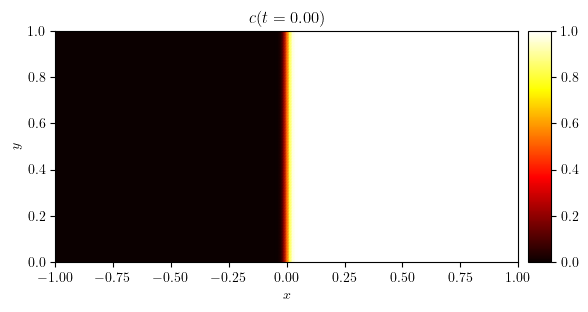

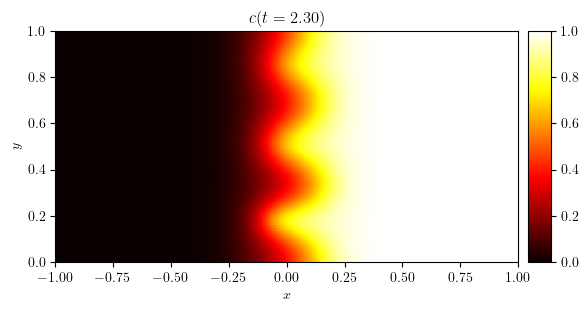

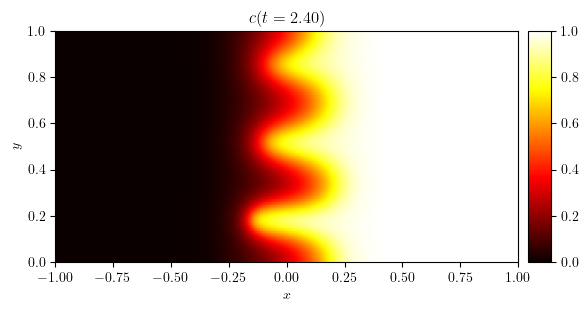

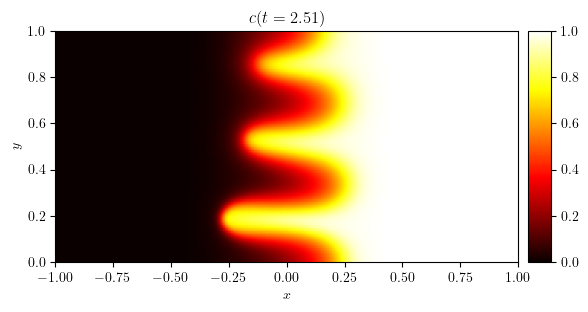

In [ ]:
c, psi = simulation['c', 'psi']

i_qrt = int(0.25 * len(c.series))
i_mid = int(0.5 * len(c.series))
time_indices = (0, i_qrt, i_mid, -1)
for i in time_indices:
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={c.time_series[i]:.2f})$')
    write(
        fig, 
        f'{get_ipynb_file_name()}_c(t={c.time_series[i]:.2f})', 
        './figures', 
        file_ext=['pdf', 'png'], 
        close=False, 
        pickle=False,
    )